In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# store filepath to variable
violent_property_crime = "Resources/420.csv"

# read csv file to pandas

violent_property_crime_df = pd.read_csv(violent_property_crime)

violent_property_crime_df


,Unnamed: 0,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,...,burglary,larceny,motor_vehicle_theft,Legal Status,Medicinal,Decriminalized,Recreational,Year legalized (Rec),Medical,Year legalized (Med)
0,0,1979,AK,Alaska,406000,1994,54,292.0,NaN,445,...,5616,15076,2501,Fully Legal,Yes,Yes,Yes,2014,Yes,1998
1,1,1980,AK,Alaska,440142,1919,39,250.0,NaN,360,...,5545,14916,2469,Fully Legal,Yes,Yes,Yes,2014,Yes,1998
2,2,1981,AK,Alaska,412000,2537,60,421.0,NaN,472,...,5479,16310,2845,Fully Legal,Yes,Yes,Yes,2014,Yes,1998
3,3,1982,AK,Alaska,438000,2732,81,374.0,NaN,586,...,5204,16672,2603,Fully Legal,Yes,Yes,Yes,2014,Yes,1998
4,4,1983,AK,Alaska,479000,2940,66,486.0,NaN,465,...,5720,17085,3084,Fully Legal,Yes,Yes,Yes,2014,Yes,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,2035,2014,WY,Wyoming,584304,1142,16,127.0,174.0,53,...,1689,9185,603,Fully Illegal,No,No,No,0,No,0
2036,2036,2015,WY,Wyoming,586555,1300,16,124.0,171.0,59,...,1762,8797,592,Fully Illegal,No,No,No,0,No,0
2037,2037,2016,WY,Wyoming,584910,1431,20,152.0,206.0,59,...,1771,8889,800,Fully Illegal,No,No,No,0,No,0
2038,2038,2017,WY,Wyoming,578934,1358,14,NaN,253.0,98,...,1556,8211,761,Fully Illegal,No,No,No,0,No,0


In [3]:
# pull just violen and propety crimee
crime_df = violent_property_crime_df[['year','state_name', 'population','violent_crime','property_crime', 'Year legalized (Rec)']]
crime_df


,year,state_name,population,violent_crime,property_crime,Year legalized (Rec)
0,1979,Alaska,406000,1994,23193,2014
1,1980,Alaska,440142,1919,22930,2014
2,1981,Alaska,412000,2537,24634,2014
3,1982,Alaska,438000,2732,24479,2014
4,1983,Alaska,479000,2940,25889,2014
...,...,...,...,...,...,...
2035,2014,Wyoming,584304,1142,11477,0
2036,2015,Wyoming,586555,1300,11151,0
2037,2016,Wyoming,584910,1431,11460,0
2038,2017,Wyoming,578934,1358,10528,0


In [4]:
# aggregate of crime pre-legalization for states
# define year cut off for calculation based on year legalized recreationally 
pre_legal_crime = crime_df.loc[crime_df['year'] <= crime_df['Year legalized (Rec)']]

# get average of property and violent crime
# pre_legal_crime = pre_legal_crime.groupby(["state_name", "year"])[['violent_crime', 'property_crime']].sum()

#add two new columms with rates of crime violent and property per year
pre_legal_crime['violent_crime_rate'] = pre_legal_crime['violent_crime']/pre_legal_crime['population'] * 100
pre_legal_crime['property_crime_rate'] = pre_legal_crime['property_crime']/pre_legal_crime['population'] * 100
pre_legal_crime


/Users/greg/opt/anaconda3/envs/pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/greg/opt/anaconda3/envs/pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,year,state_name,population,violent_crime,property_crime,Year legalized (Rec),violent_crime_rate,property_crime_rate
0,1979,Alaska,406000,1994,23193,2014,0.491133,5.712562
1,1980,Alaska,440142,1919,22930,2014,0.435996,5.209682
2,1981,Alaska,412000,2537,24634,2014,0.615777,5.979126
3,1982,Alaska,438000,2732,24479,2014,0.623744,5.588813
4,1983,Alaska,479000,2940,25889,2014,0.613779,5.404802
...,...,...,...,...,...,...,...,...
1909,2008,Washington,6549224,21888,249283,2012,0.334208,3.806298
1910,2009,Washington,6664195,22412,245215,2012,0.336305,3.679589
1911,2010,Washington,6742950,21138,249426,2012,0.313483,3.699063
1912,2011,Washington,6823267,20152,244209,2012,0.295342,3.579063


In [5]:
# aggregate of crime post-legalization for states
# define year cut off for calculation based on year legalized recreationally 
post_legal_crime = crime_df[crime_df['Year legalized (Rec)'] != 0]

post_legal_crime = post_legal_crime.loc[post_legal_crime['year'] >= post_legal_crime['Year legalized (Rec)']]

# get average of property and violent crime
# post_legal_crime = post_legal_crime.groupby(["state_name", "year"])[['violent_crime', 'property_crime']].sum()
post_legal_crime['violent_crime_rate'] = post_legal_crime['violent_crime']/post_legal_crime['population'] * 100
post_legal_crime['property_crime_rate'] = post_legal_crime['property_crime']/post_legal_crime['population'] * 100

post_legal_crime


,year,state_name,population,violent_crime,property_crime,Year legalized (Rec),violent_crime_rate,property_crime_rate
35,2014,Alaska,737046,4684,20334,2014,0.635510,2.758851
36,2015,Alaska,737709,5391,20806,2014,0.730776,2.820353
37,2016,Alaska,741522,5966,24876,2014,0.804561,3.354722
38,2017,Alaska,739786,6338,26203,2014,0.856734,3.541970
39,2018,Alaska,735139,6555,24345,2014,0.891668,3.311619
197,2016,California,39296476,174796,1002070,2016,0.444813,2.550025
198,2017,California,39399349,178597,987063,2016,0.453299,2.505277
199,2018,California,39461588,176604,941644,2016,0.447534,2.386229
233,2012,Colorado,5189458,15951,139355,2012,0.307373,2.685348
234,2013,Colorado,5272086,16099,139974,2012,0.305363,2.655002


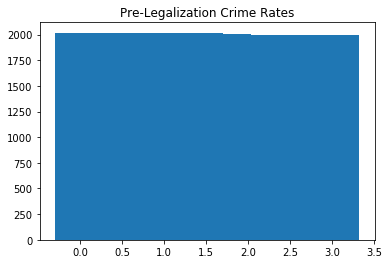

In [6]:
#make a graph 
plt.bar(pre_legal_crime['violent_crime_rate'],pre_legal_crime['year'])
plt.title("Pre-Legalization Crime Rates")
plt.show()